In [1]:
from matplotlib.ticker import FuncFormatter
from scipy.integrate import odeint
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import numpy as np


#%matplotlib inline

from artificialdata import init
from artificialdata import obs
from artificialdata import odes
from artificialdata import p_vec
from artificialdata import time_vec
from artificialdata import v_in

In [2]:
def error(p, t, init, v_in):
    return ((odeint(odes, init, t, args=(p, v_in)) - obs).flatten()**2).sum()

In [3]:
# Grid of paramters to scan
n = 500
Vmax_ub = 100
Km_ub = 10
Vmax_vec = np.linspace(1/n, Vmax_ub, n)
Km_vec = np.linspace(0.01/n, Km_ub, n)

In [4]:
landscape = np.zeros((n, n))
for i, km in enumerate(Km_vec):
    for j, vmax in enumerate(Vmax_vec):
        landscape[i, j] = error([vmax, km], time_vec, init, v_in)
# rows are added from top to bottom
landscape = landscape[::-1]

In [5]:
def ticker_Vmax(x, pos):
    """The two args are the value and tick position"""
    return str(x/n * Vmax_ub)
def ticker_Km(x, pos):
    """The two args are the value and tick position"""
    return str(Km_ub - (x/n * Km_ub))

formatter_Vmax = FuncFormatter(ticker_Vmax)
formatter_Km = FuncFormatter(ticker_Km)

<IPython.core.display.Javascript object>


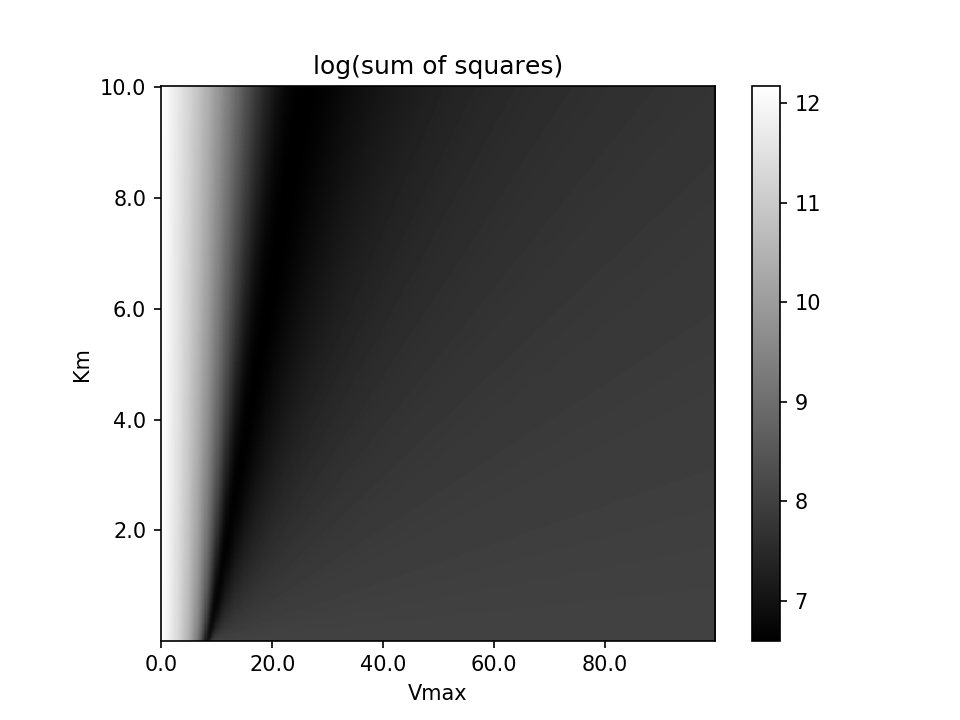

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(np.log(landscape), cmap='gray')
ax.xaxis.set_major_formatter(formatter_Vmax)
ax.yaxis.set_major_formatter(formatter_Km)
ax.set_xlabel('Vmax')
ax.set_ylabel('Km')
ax.set_title('log(sum of squares)')
plt.colorbar(im)
plt.show()

<IPython.core.display.Javascript object>


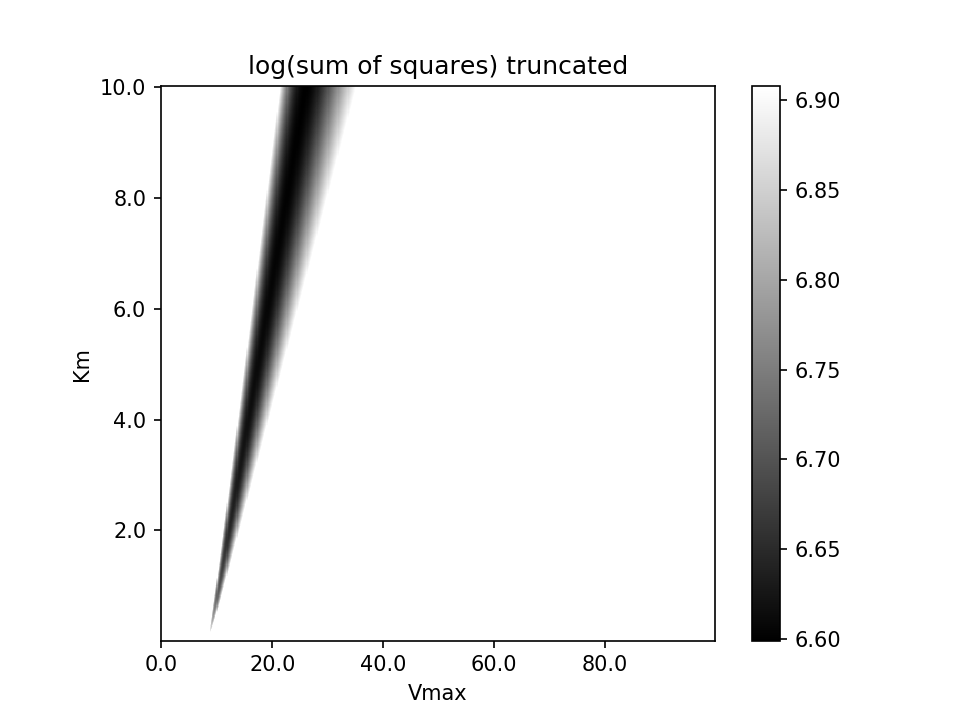

In [7]:
thresh = 1000
landscape[landscape > thresh] = thresh
fig, ax = plt.subplots()
im = ax.imshow(np.log(landscape), cmap='gray')
ax.xaxis.set_major_formatter(formatter_Vmax)
ax.yaxis.set_major_formatter(formatter_Km)
ax.set_xlabel('Vmax')
ax.set_ylabel('Km')
ax.set_title('log(sum of squares) truncated')
plt.colorbar(im)
plt.show()

<IPython.core.display.Javascript object>


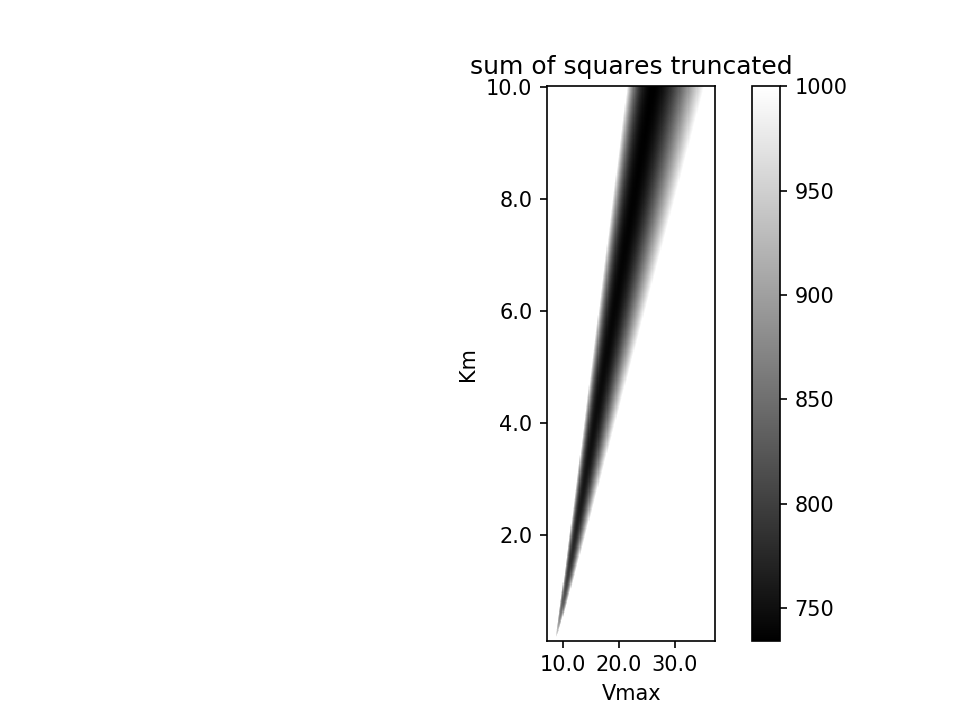

In [8]:
fig, ax = plt.subplots()
im = ax.imshow(landscape, cmap='gray')
ax.xaxis.set_major_formatter(formatter_Vmax)
ax.yaxis.set_major_formatter(formatter_Km)
ax.set_xlabel('Vmax')
ax.set_ylabel('Km')
ax.set_title('sum of squares truncated')
plt.colorbar(im)
plt.show()